**Task 1: Implementation of the LinearRegression class**

In [4]:
import numpy as np

class LinearRegression:
  def __init__(self, batch_size=32, regularization=0, max_epochs=100, patience =3, learning_rate=.001):
      self.batch_size = batch_size
      self.regularization = regularization
      self.max_epochs = max_epochs
      self.patience = patience
      self.loss_per_sample=[]
      self.mean_loss_per_batch=[]
      self.weights = None
      self.bias = None
      self.learning_rate = learning_rate
      self.weights_updated = []
      self.bias_updated = []

  def fit(self, X, y, batch_size=32, regularization=0, max_epochs=100, patience=3,learning_rate=.001):
      self.batch_size = batch_size
      self.regularization = regularization
      self.max_epochs = max_epochs
      self.patience = patience
      self.learning_rate = learning_rate
      # Number of samples and features
      n_samples, n_features = X.shape
      n_output = y.shape[1]
      #initialize weights and biases
      self.weights = np.random.normal(0, 1/np.sqrt(n_features), (n_features, n_output))
      self.bias = np.zeros((1,n_output))
      #random split
      split = int(0.9*n_samples)
      X_train, X_val = X[:split], X[split:]
      y_train, y_val = y[:split], y[split:]
      #Intilization
      self.mean_loss_per_batch=[]
      best_weights = self.weights
      best_bias = self.bias
      best_loss = float("inf")
      no_improvement = 0
      #keep track of loss on validation set 
      for epoch in range(max_epochs):
        self.loss_per_sample=[]
        for i in range(0,split, batch_size):
          #Making a batch
          X_batch = X_train[i:i + batch_size]
          y_batch = y_train[i:i + batch_size]
          #computing the prediction and the loss
          y_pred = X_batch.dot(self.weights) + self.bias
          regularization_term = (self.regularization/2*batch_size) * np.sum(np.square(self.weights))
          loss = np.mean((y_batch-y_pred)**2) + regularization_term
          self.loss_per_sample.append(loss) 
          #computing the gradient loss with respect to weight and bias
          dw =  (1/batch_size) * (X_batch.T).dot(y_pred-y_batch) + (self.regularization * self.weights)
          db = (1/batch_size) * np.sum(y_pred-y_batch)
          #update weights and bias
          self.weights -= learning_rate * dw
          self.bias -= learning_rate * db
        #update predicted y value and mean loss of a batch
        self.mean_loss_per_batch.append(np.mean(self.loss_per_sample))
        y_pred = X_val.dot(self.weights) + self.bias
        #mse yval
        val_loss = np.mean((y_val-y_pred)**2)
        #patience
        if val_loss <= best_loss:
          best_weights = self.weights
          best_bias = self.bias
          best_loss = val_loss
          no_improvement = 0
        else:
          no_improvement +=1
          if no_improvement == patience:
            break
      self.weights_updated = self.weights
      self.bias_updated = self.bias

  def predict(self, X):
    y_pred = X.dot(self.weights) + self.bias
    return y_pred
  
  def score(self, X, y):
    y_pred = self.predict(X)
    mse = np.mean((y-y_pred)**2)
    return mse
  
  def rmse(self,X,y):
    y_pred = self.predict(X)
    mse = np.mean((y-y_pred)**2)
    rmse = np.sqrt(mse)
    return rmse

**Task 2: Regression with a single output**

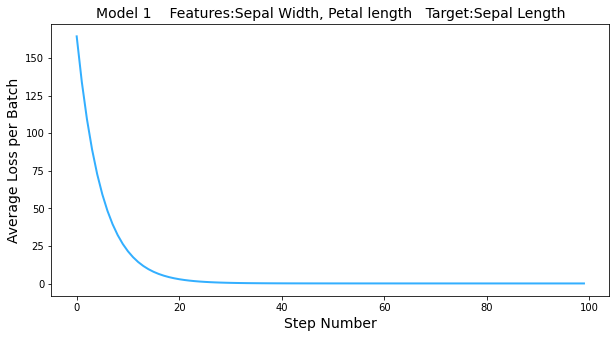

The mean square error of model 1: 0.17807508589704274


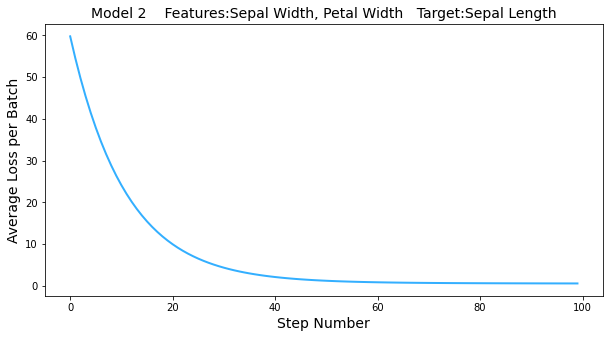

The mean square error of model 2: 0.3297524095026992


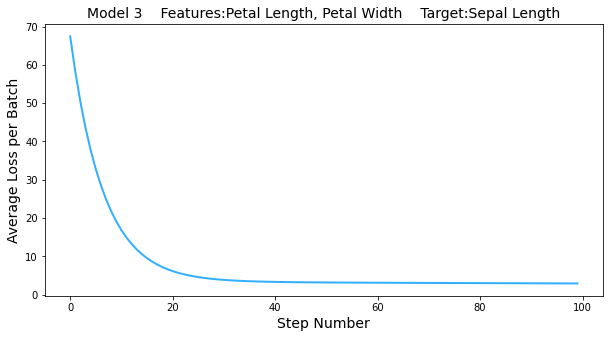

The mean square error of model 3: 2.896442816427042


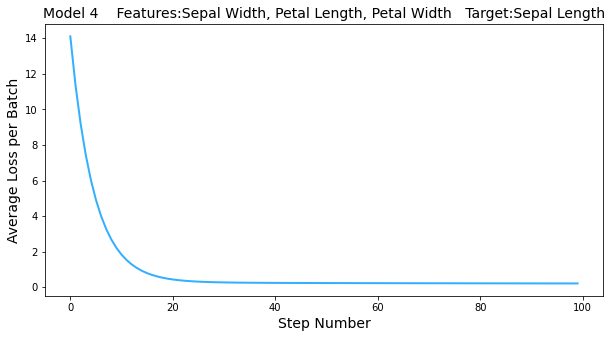

The mean square error of model 4: 0.17484044364108414


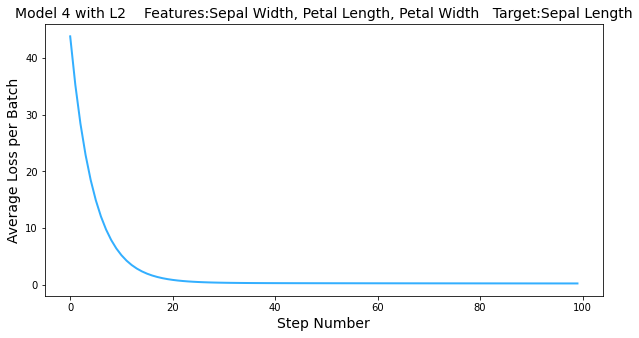

The mean square error of model 4 with regularization: 0.21860720918148271
The weight matrix and bias matrix of model 4 without regularization:
[[1.28340204]
 [0.40532993]
 [0.23540516]] [[0.11840916]]
The weight matrix and bias of model 4 with regularization:
[[1.02255837]
 [0.5779331 ]
 [0.16766436]] [[0.26766199]]
The difference in weight matrix and bias matrix:
[[ 0.26084367]
 [-0.17260317]
 [ 0.0677408 ]] [[-0.14925283]]


In [5]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#load the data
iris = datasets.load_iris()
lr = LinearRegression()
#split the data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.data, test_size=0.10, random_state=22101992, stratify = iris.target)

#model 1 Features:Sepal Width, Petal length & Target:Sepal Length
lr.fit(X=X_train[:,1:3],y=y_train[:,:1])
lr.predict(X=X_test[:,1:3])
x = np.arange(len(lr.mean_loss_per_batch))
y = lr.mean_loss_per_batch
plt.figure(figsize=(10,5))
plt.plot(x, y, lw=2, c='#33AFFF')
plt.title('Model 1    Features:Sepal Width, Petal length   Target:Sepal Length', size=14)
plt.xlabel('Step Number', size=14)
plt.ylabel('Average Loss per Batch', size=14)
plt.show()
print("The mean square error of model 1:",lr.score(X=X_test[:,1:3],y=y_test[:,:1]))

#Model 2 Features:Sepal Width, Petal Width & Target:Sepal Length
lr.fit(X=X_train[:,1::2],y=y_train[:,:1])
lr.predict(X=X_test[:,1::2])
x = np.arange(len(lr.mean_loss_per_batch))
y = lr.mean_loss_per_batch
plt.figure(figsize=(10,5))
plt.plot(x, y, lw=2, c='#33AFFF')
plt.title('Model 2    Features:Sepal Width, Petal Width   Target:Sepal Length', size=14)
plt.xlabel('Step Number', size=14)
plt.ylabel('Average Loss per Batch', size=14)
plt.show()
print("The mean square error of model 2:",lr.score(X=X_test[:,1::2],y=y_test[:,:1]))

#model 3 Features:Petal Length, Petal Width & Target:Sepal Length
lr.fit(X=X_train[:,2:],y=y_train[:,:1])
lr.predict(X=X_test[:,2:])
x = np.arange(len(lr.mean_loss_per_batch))
y = lr.mean_loss_per_batch
plt.figure(figsize=(10,5))
plt.plot(x, y, lw=2, c='#33AFFF')
plt.title('Model 3    Features:Petal Length, Petal Width    Target:Sepal Length', size=14)
plt.xlabel('Step Number', size=14)
plt.ylabel('Average Loss per Batch', size=14)
plt.show()
print("The mean square error of model 3:",lr.score(X=X_test[:,2:],y=y_test[:,:1]))

#model 4 Features:Sepal Width, Petal Length, Petal Width & Target:Sepal Length
lr.fit(X=X_train[:,1:],y=y_train[:,:1])
lr.predict(X=X_test[:,1:])
x = np.arange(len(lr.mean_loss_per_batch))
y = lr.mean_loss_per_batch
a = lr.weights_updated
c = lr.bias_updated
plt.figure(figsize=(10,5))
plt.plot(x, y, lw=2, c='#33AFFF')
plt.title('Model 4    Features:Sepal Width, Petal Length, Petal Width   Target:Sepal Length', size=14)
plt.xlabel('Step Number', size=14)
plt.ylabel('Average Loss per Batch', size=14)
plt.show()
print("The mean square error of model 4:",lr.score(X=X_test[:,1:],y=y_test[:,:1]))

#model 4 with regularization Features:Sepal Width, Petal Length, Petal Width & Target:Sepal Length
lr.fit(X=X_train[:,1:],y=y_train[:,:1],regularization=.001)
lr.predict(X=X_test[:,1:])
b = lr.weights_updated
d = lr.bias_updated
x = np.arange(len(lr.mean_loss_per_batch))
y = lr.mean_loss_per_batch
plt.figure(figsize=(10,5))
plt.plot(x, y, lw=2, c='#33AFFF')
plt.title('Model 4 with L2    Features:Sepal Width, Petal Length, Petal Width   Target:Sepal Length', size=14)
plt.xlabel('Step Number', size=14)
plt.ylabel('Average Loss per Batch', size=14)
plt.show()
print("The mean square error of model 4 with regularization:",lr.score(X=X_test[:,1:],y=y_test[:,:1]))
print("The weight matrix and bias matrix of model 4 without regularization:")
print(a,c)
print("The weight matrix and bias of model 4 with regularization:")
print(b,d)
print("The difference in weight matrix and bias matrix:")
print(a-b,c-d)

**Task 3: Regression with Multiple Outputs**

In [ ]:
import numpy as np
import pandas as pd
import scipy.io as sio
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/cse6363/traffic_dataset.mat"

# The provided data is given in a `.mat` file.
# We can load it using the `scipy.io.loadmat` function.
mat = sio.loadmat(data_path)
input_train = mat['tra_X_tr']
output_train = mat['tra_Y_tr'].T
input_test = mat['tra_X_te']
output_test = mat['tra_Y_te'].T
adj_mat = mat['tra_adj_mat']

input_train = input_train.squeeze()
input_test = input_test.squeeze()

# Convert the sparse matrix to a dense matrix
data = []
test_data = []

for i in range(input_train.shape[0]):
    data.append(input_train[i].todense())

for i in range(input_test.shape[0]):
    test_data.append(input_test[i].todense())

# Convert the data to a numpy array
data = np.array(data, dtype=np.float64)
test_data = np.array(test_data, dtype=np.float64)
#Reshaping the input matrix
input_train = np.reshape(data,(1261,-1))
input_test = np.reshape(test_data,(840,-1))

lr.fit(X=input_train,y=output_train,batch_size=32, regularization=.001, max_epochs=1000, patience=500,learning_rate=0.001)
y=lr.predict(X=input_train)
print('The mean sqaure error is:',lr.score(X=input_test,y=output_test))
print('The root mean sqaure error is:',lr.rmse(X=input_test,y=output_test))

Mounted at /content/drive
